In [74]:
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
import numpy as np
from factor_analyzer import FactorAnalyzer
from matplotlib import pyplot as plt

In [75]:
df_stress = pd.read_csv("data/StressLevelDataset.csv")
df_stress.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [76]:
for col in df_stress.columns:
    df_stress[col] = df_stress[col].astype(float)
df_stress = StandardScaler().set_output(transform = 'pandas').fit_transform(df_stress)
df_stress.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,0.480208,0.248612,-0.985559,-0.201393,-0.360741,-1.418416,-0.426445,0.890211,-0.488949,0.430695,...,-0.539196,0.160736,-0.472800,0.254213,0.229550,0.112839,0.186334,0.164249,-0.403377,0.004428
1,0.643746,-1.093590,1.014653,0.316508,1.768859,0.981981,-1.072574,0.890211,0.264334,-1.357096,...,-0.539196,-1.253741,1.047901,-1.190927,1.537869,-0.841952,0.888277,1.575763,1.557071,1.222011
2,0.153131,0.024912,1.014653,0.187033,-0.360741,-1.418416,-0.426445,-0.538282,-0.488949,-0.463200,...,-0.539196,-0.546502,0.287551,0.254213,-0.424609,0.112839,0.186334,-0.541508,-0.403377,0.004428
3,0.807284,-0.646189,1.014653,0.316508,1.058992,0.981981,-1.072574,0.175964,1.017616,-0.463200,...,-0.539196,-0.546502,1.047901,-1.190927,0.883709,-0.841952,0.888277,0.870006,1.557071,1.222011
4,0.807284,1.143414,-0.985559,-0.719293,-0.360741,0.981981,1.511942,-1.252529,0.264334,-0.463200,...,0.158587,0.867974,0.287551,-1.190927,-0.424609,-0.841952,1.590220,-1.953023,1.557071,0.004428


## 1. Sprawdzanie adekwatnosci danych

In [77]:
#test KMO
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(df_stress)
print(kmo_model)

0.9712055827228677


C:\Users\lamla\miniconda3\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


In [78]:
#test Bartletta
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi2, p = calculate_bartlett_sphericity(df_stress)
print(chi2)

19237.2251765758


## 2. Dobór ilości czynników

In [79]:
eig_vals, eig_vecs = np.linalg.eig(df_stress.cov())

In [80]:
total_var = df_stress.var().sum()
print(total_var)

21.01910828025475


In [81]:
eig_val_sum = eig_vals.sum()
print(eig_val_sum)

21.019108280254795


In [82]:
var_exp = eig_vals / total_var
print(var_exp)

[0.60490213 0.05707705 0.03304513 0.00486991 0.02834732 0.0266293
 0.00832817 0.02505763 0.0225828  0.02181024 0.01109353 0.01934775
 0.01268874 0.01301077 0.01345172 0.01837897 0.01734937 0.01658966
 0.01565385 0.01491553 0.01487043]


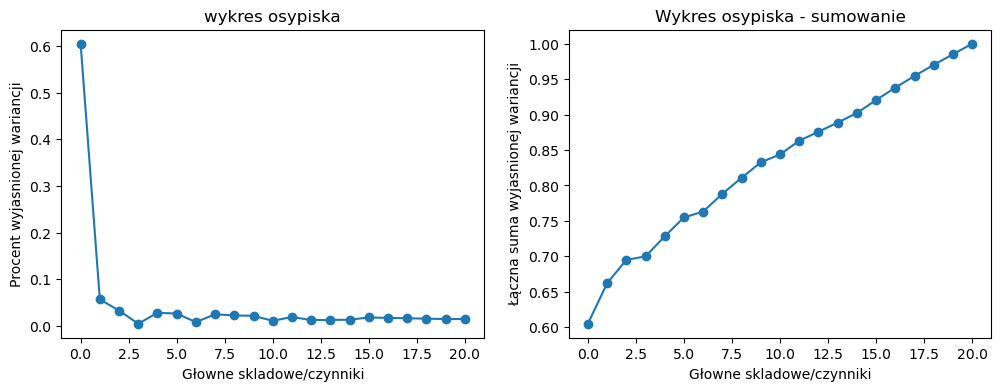

In [83]:
fig, ax = plt.subplots(1,2,figsize = (12,4))
ax[0].plot(var_exp, marker = 'o')
ax[0].set_title("wykres osypiska")
ax[0].set_xlabel("Głowne skladowe/czynniki")
ax[0].set_ylabel("Procent wyjasnionej wariancji")

ax[1].plot(np.cumsum(var_exp), marker = 'o')
ax[1].set_title("Wykres osypiska - sumowanie")
ax[1].set_xlabel("Głowne skladowe/czynniki")
ax[1].set_ylabel("Łączna suma wyjasnionej wariancji")

plt.show()


In [84]:
print(np.cumsum(var_exp))

[0.60490213 0.66197918 0.69502431 0.69989422 0.72824154 0.75487084
 0.76319901 0.78825664 0.81083944 0.83264968 0.84374321 0.86309096
 0.8757797  0.88879047 0.90224219 0.92062116 0.93797052 0.95456019
 0.97021404 0.98512957 1.        ]


In [85]:
kaiser_rule = np.where(eig_vals > 1)[0]
print(kaiser_rule)

[0 1]


## 3. Analiza czynnikowa i badanie ladunkow czynnikowych

In [86]:
fa = FactorAnalyzer(n_factors = 2, rotation = None)
fa.fit(df_stress)

C:\Users\lamla\miniconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


FactorAnalyzer(n_factors=2, rotation=None, rotation_kwargs={})

In [87]:
fa_loadings = fa.loadings_
print(fa_loadings)

[[ 0.83422802 -0.10832202]
 [-0.8284969  -0.11760141]
 [ 0.737791   -0.09739902]
 [ 0.82799615  0.02347331]
 [ 0.77891503 -0.02751937]
 [ 0.50515552  0.86387488]
 [-0.82173224  0.13220876]
 [ 0.63503715 -0.19435438]
 [ 0.70380539 -0.01935762]
 [-0.66285888  0.06838908]
 [-0.77874101  0.08560457]
 [-0.77000274  0.10080068]
 [-0.78097722  0.12950613]
 [ 0.68601514 -0.0074396 ]
 [-0.80199589  0.01847107]
 [ 0.84578966 -0.002077  ]
 [-0.74491509 -0.42701919]
 [ 0.76645788 -0.02349167]
 [ 0.76501639  0.02031847]
 [ 0.8297277  -0.08226629]
 [ 0.8961397  -0.06567832]]


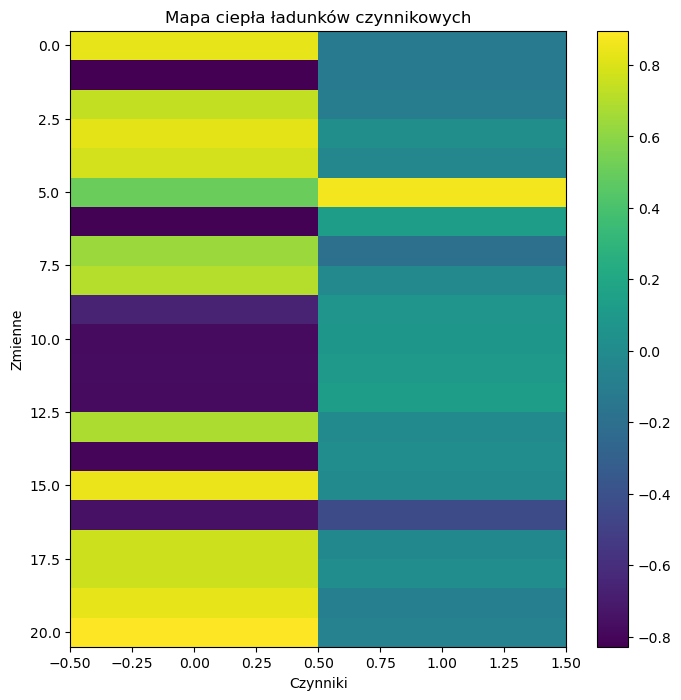

In [88]:
plt.figure(figsize = (8,8))
plt.title('Mapa ciepła ładunków czynnikowych')
plt.imshow(fa_loadings, cmap = 'viridis', aspect = 'auto')
plt.colorbar()
plt.xlabel('Czynniki')
plt.ylabel('Zmienne')
plt.show()

In [89]:
com = pd.Series(fa.get_communalities(), index = df_stress.columns)
print(com)

anxiety_level                   0.707670
self_esteem                     0.700237
mental_health_history           0.553822
depression                      0.686129
headache                        0.607466
blood_pressure                  1.001462
sleep_quality                   0.692723
breathing_problem               0.441046
noise_level                     0.495717
living_conditions               0.444059
safety                          0.613766
basic_needs                     0.603065
academic_performance            0.626697
study_load                      0.470672
teacher_student_relationship    0.643539
future_career_concerns          0.715364
social_support                  0.737244
peer_pressure                   0.588010
extracurricular_activities      0.585663
bullying                        0.695216
stress_level                    0.807380
dtype: float64


# 4. Sprawdzenie dopasowania modelu

In [90]:
from semopy import Model, calc_stats

In [91]:
model_desc ="""

Mental =~ anxiety_level + self_esteem + mental_health_history + depression + headache + sleep_quality
EnvSocial =~ noise_level + living_conditions + safety + basic_needs + academic_performance + study_load + teacher_student_relationship + future_career_concerns + social_support + extracurricular_activities + bullying
"""

In [93]:
model = Model(model_desc)
model.fit(df_stress)
stats = calc_stats(model)
print(stats)

       DoF  DoF Baseline        chi2  chi2 p-value  chi2 Baseline       CFI  \
Value  118           136  507.855761           0.0   14585.286106  0.973019   

           GFI      AGFI      NFI       TLI     RMSEA        AIC         BIC  \
Value  0.96518  0.959869  0.96518  0.968903  0.054829  69.076626  244.183917   

         LogLik  
Value  0.461687  
